In [2]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn import metrics

import seaborn as sns
import plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv("titanic.csv")
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [6]:
total = df.isnull().sum().sort_values(ascending=False)
percent_1=df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1,1)).sort_values(ascending = False)
missing_data = pd.concat([total,percent_2],axis=1,keys=['Total','%'])
missing_data.head(5)

,Total,%
body,1188,90.8
cabin,1014,77.5
boat,823,62.9
home.dest,564,43.1
age,263,20.1


In [7]:
import re

deck = {"A":1,"B":2,"C":3,"D":4,"E":5,"F":6,"G":7,"U":8}

for dataset in [df]:
    dataset['cabin']= dataset['cabin'].fillna("U0")
    dataset['deck'] = dataset['cabin'].map(lambda x: re.compile("([a-zA-Z])+").search(x).group())
    dataset['deck'] = dataset['deck'].map(deck)
    dataset['deck'] = dataset['deck'].fillna(0)
    dataset['deck'] = dataset['deck'].astype(int)

df = df.drop(['cabin'],axis = 1)
df = df.drop(['ticket'], axis = 1)
df= df.drop(['boat'],axis=1)
df=df.drop(['body'],axis=1)
df=df.drop(['home.dest'],axis=1)

In [8]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,fare,embarked,deck
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,211.3375,S,2
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,151.5500,S,3
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,151.5500,S,3
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,151.5500,S,3
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,151.5500,S,3


In [9]:
for dataset in [df]:
    mean = df["age"].mean()
    std = df["age"].std()
    is_null = dataset["age"].isnull().sum()
    rand_age = np.random.randint(mean-std,mean+std,size=is_null)
    age_slice  = dataset["age"].copy()
    age_slice[np.isnan(age_slice)]= rand_age
    dataset["age"]=age_slice
    dataset["age"]=df["age"].astype(int)
df["age"].isnull().sum()

0

In [10]:
df = df.drop(['name'],axis =1)
df = df.drop(['sex'],axis =1)

In [11]:
feature = df.drop('survived',axis=1)
label = df['survived']

In [12]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   age       1309 non-null   int64  
 3   sibsp     1309 non-null   int64  
 4   parch     1309 non-null   int64  
 5   fare      1308 non-null   float64
 6   embarked  1307 non-null   object 
 7   deck      1309 non-null   int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 81.9+ KB
None


In [26]:
print(feature.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   age       1309 non-null   int64  
 2   sibsp     1309 non-null   int64  
 3   parch     1309 non-null   int64  
 4   fare      1308 non-null   float64
 5   embarked  1307 non-null   object 
 6   deck      1309 non-null   int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 71.7+ KB
None


In [11]:
X1 = feature[['age', 'parch']].iloc[: , :].values
inertia = []
for n in range(1, 11):
    algorithm = KMeans(n_clusters = n, init = 'random')
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

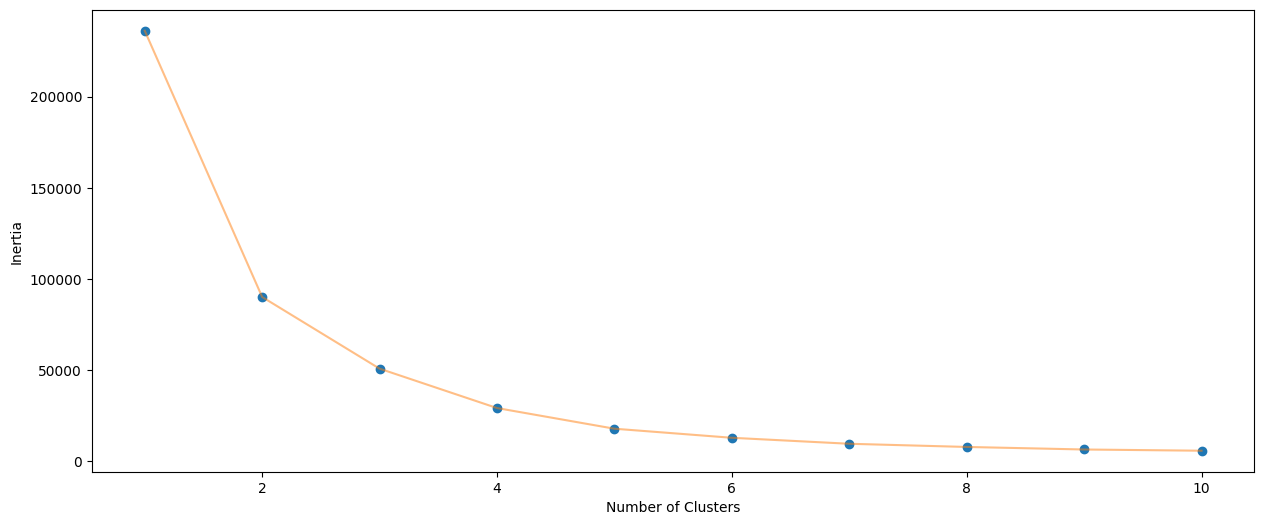

In [12]:
plt.figure(1, figsize = (15, 6))
plt.plot(np.arange(1, 11), inertia, 'o')
plt.plot(np.arange(1, 11), inertia, '-', alpha = 0.5)
plt.xlabel('Number of Clusters'), plt.ylabel('Inertia')
plt.show()

In [13]:
algorithm = KMeans(n_clusters = 2, init = 'random')
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


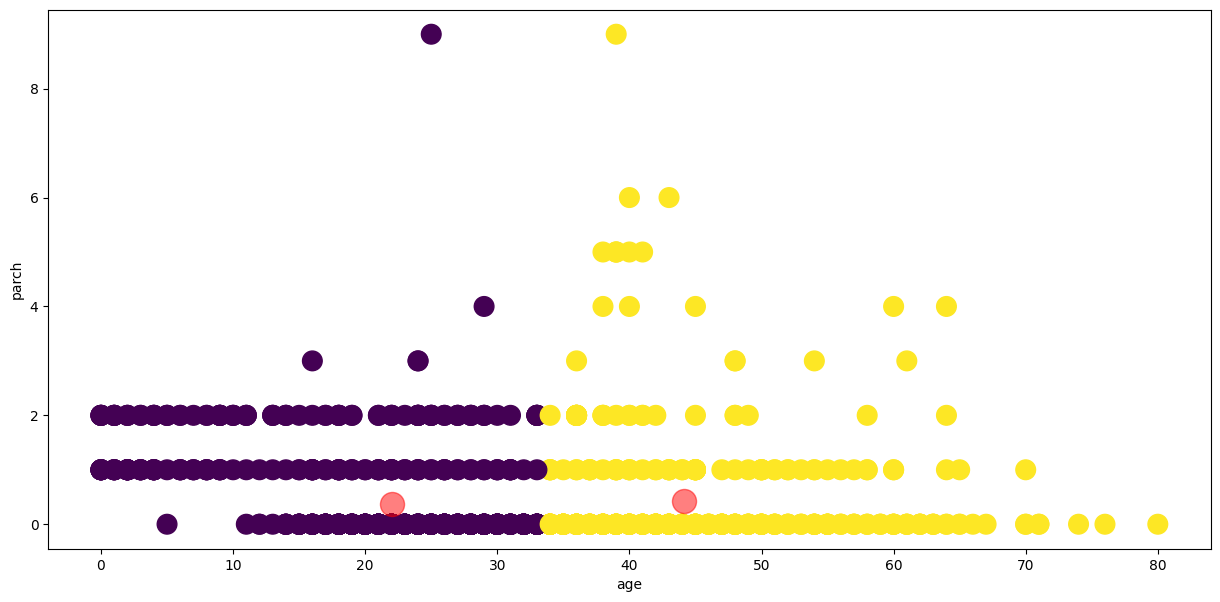

In [14]:
plt.figure(1, figsize = (15, 7))
plt.clf()
plt.scatter(x = 'age', y = 'parch', data = df, c = labels1, s = 200)
plt.scatter(x = centroids1[: , 0], y = centroids1[: , 1], s =300, c = 'red', alpha = 0.5)
plt.ylabel('parch'), plt.xlabel('age')
plt.show()

In [15]:
metrics.silhouette_score(X1, labels1, metric = 'euclidean')

0.5624709879524786

In [16]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(feature,label,test_size=0.3,random_state=0)

In [17]:
x1_train = x_train[['age', 'parch']].iloc[: , :].values
inertia = []
for n in range(1, 11):
    algorithm = KMeans(n_clusters = n, init = 'random')
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

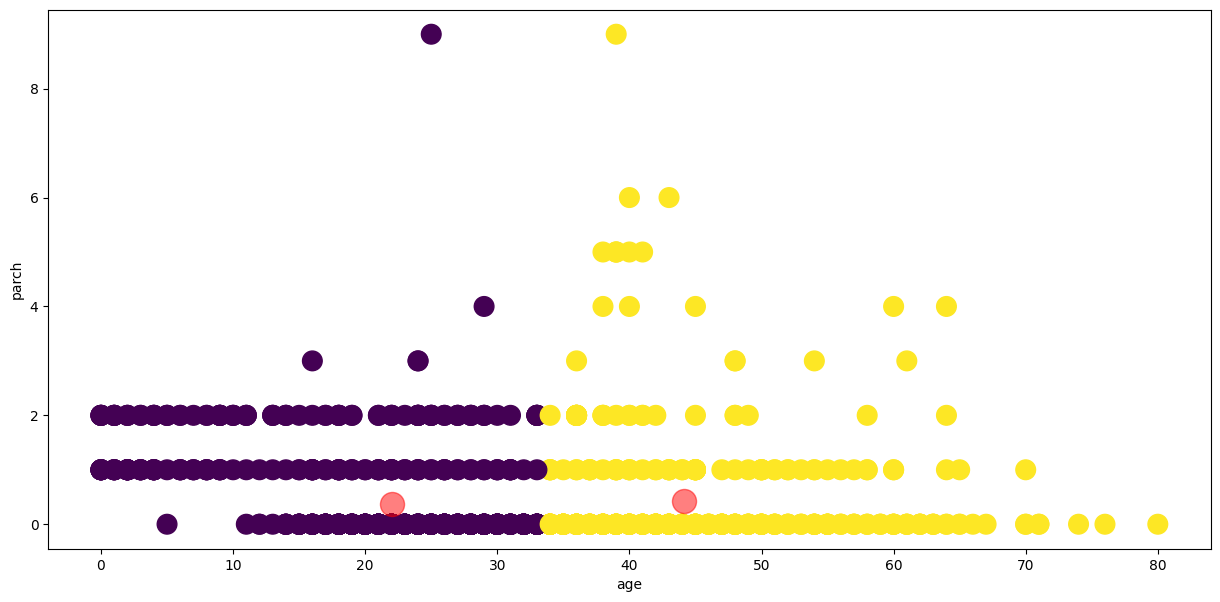

In [18]:
plt.figure(1, figsize = (15, 7))
plt.clf()
plt.scatter(x = 'age', y = 'parch', data = df, c = labels1, s = 200)
plt.scatter(x = centroids1[: , 0], y = centroids1[: , 1], s =300, c = 'red', alpha = 0.5)
plt.ylabel('parch'), plt.xlabel('age')
plt.show()

In [19]:
algorithm = KMeans(n_clusters = 2, init = 'random')
algorithm.fit(x1_train,y_train)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [20]:
x_test = x_test[['age','parch']]
k_pred = algorithm.predict(x_test)

k_score = metrics.accuracy_score(y_test,k_pred)
print("Accruracy:",k_score)
print("Report:",metrics.classification_report(y_test,k_pred))

Accruracy: 0.4910941475826972
Report:               precision    recall  f1-score   support

           0       0.65      0.40      0.49       246
           1       0.39      0.65      0.49       147

    accuracy                           0.49       393
   macro avg       0.52      0.52      0.49       393
weighted avg       0.56      0.49      0.49       393



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


In [21]:
k_cm = metrics.confusion_matrix(y_test,k_pred)

In [22]:
plt.figure(figsize=(12,12))
sns.heatmap(kmeans_cm,annot=True, fmt=".3f",linewidth=.5,square=True,cmap='Blues_r');
plt.xlabel('Actual Label');
plt.ylabel('Predicted Label');
title ='K-means Accuracy Score - {0}'.format(k_score)
plt.title(title,size=15);

NameError: name 'kmeans_cm' is not defined

<Figure size 1200x1200 with 0 Axes>